In [1]:
%matplotlib inline

# Choose and work with one equation

In [2]:
import warnings
warnings.filterwarnings('ignore')

import time
import sys
import tempfile

import skimage.io as im_io

from PIL import TiffImagePlugin as tip
from PIL.TiffImagePlugin import Image

import matplotlib.pyplot as pyplot

sys.path.insert(0, '../src/')
sys.path.insert(0, 'scalygraphic/src/')

from im_scale_products import *
from impute_color import *

def get_test_domain_dict(it_max=None, scale_dist=None):
    """ Usage: 
    domain_dict = get_center_domain_dict(it_max, scale_dist)
    """
    if it_max is None:
        it_max = 64
        
    if scale_dist is None:
        scale_dist = 12
        
    domain_dict = get_default_domain_dict()
    domain_dict['it_max'] = it_max
    domain_dict['max_d'] = scale_dist / domain_dict['zoom']
    domain_dict['n_rows'] = 255
    domain_dict['n_cols'] = 255
    
    return domain_dict

domain_dict = get_test_domain_dict()
for k, v in domain_dict.items():
    print(k,v)
    
# print('\n')
# for n, t in name_functionhandle_dict.items():
#     print('%02i'%(n), t)
show_equations()

center_point 0j
zoom 0.5
theta 0.0
it_max 64
max_d 24.0
n_rows 255
n_cols 255

	im_scale_products.py with function show_equations():

	name_functionhandle_dict.items()
000 ('ElGato', <function ElGato at 0x12b407048>)
001 ('IslaLace', <function IslaLace at 0x12b403d90>)
002 ('ItchicuPpwrF', <function ItchicuPpwrF at 0x12b403ea0>)
003 ('Nautuliz', <function Nautuliz at 0x12b403ae8>)
004 ('RoyalZ', <function RoyalZ at 0x12b403e18>)
005 ('bugga_bear', <function bugga_bear at 0x12b4038c8>)
006 ('de_Okeeffe', <function de_Okeeffe at 0x12b403d08>)
007 ('decPwrAFx', <function decPwrAFx at 0x12b403bf8>)
008 ('dreadSkull', <function dreadSkull at 0x12b403c80>)
009 ('nlC3', <function nlC3 at 0x12b403b70>)
010 ('plC6', <function plC6 at 0x12b403f28>)
011 ('snflk', <function snflk at 0x12b407158>)
012 ('starfish_ish', <function starfish_ish at 0x12b4039d8>)
013 ('starfish_ish_II', <function starfish_ish_II at 0x12b403a60>)
014 ('thunderHead', <function thunderHead at 0x12b4070d0>)


In [3]:
fcn_number = 11
fcn_name, fcn = name_functionhandle_dict[fcn_number][0], name_functionhandle_dict[fcn_number][1]
print(fcn_name)

snflk


[3.01874673, (-1.00776339+0.74204475j)]


               snflk: 15.737453 seconds
		p = [3.01874673, (-1.00776339+0.74204475j)]
             ET                            Zd                            Zr                           All


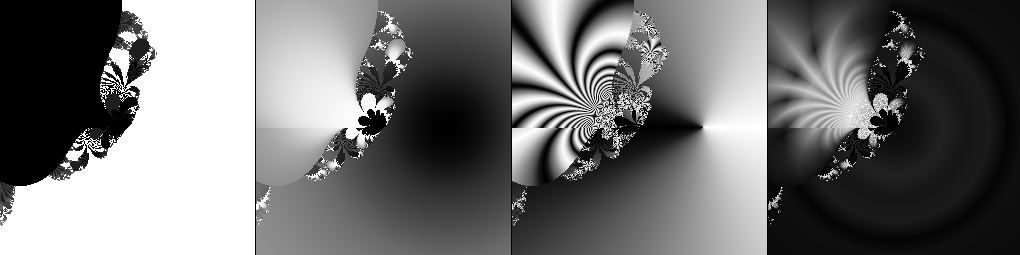

In [4]:
t0 = time.time()
p = p = [3.01874673, -1.00776339+0.74204475j]
# p = p = fcn(0.0, None)
print(p)

list_tuple = [(fcn, (p))]

ET, Z, Z0 = eq_iter.get_primitives(list_tuple, domain_dict)
Zd_n2, Zr_n2, ETn_n2 = etg_norm(Z0, Z, ET)

g_im_et = primitive_2_gray(ETn_n2)
# complex result vectors: distance component
g_im_Zd = primitive_2_gray(Zd_n2)

# complex result vectors: rotation component
g_im_Zr = primitive_2_gray(Zr_n2)

im_gray = get_gray_im(ET, Z, Z0)

im_list = [g_im_et, g_im_Zd, g_im_Zr, im_gray]
new_im = cat_im_list_hori(im_list)

tt = time.time() - t0
print('\n')
print('%20s: %0.6f seconds\n\t\tp ='%(fcn_name, tt), p)
print('%15s%30s%30s%30s'%('ET','Zd','Zr', 'All'))
display(new_im)
